In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import swifter
import spacy
import ssl
from spacy import displacy
import pandas as pd
from spacy.lang.en import English
from spacy.pipeline import EntityRuler
from sklearn.metrics import accuracy_score
from spacy.matcher import Matcher
from spacy.pipeline import EntityRuler

from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from fuzzywuzzy import process, fuzz

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
stop=set(stopwords.words('english'))
#nltk.download('stopwords')

from sklearn.linear_model import LogisticRegression

from joblib import Parallel, delayed

from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt

import seaborn as sns

import re

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

global cls_acc
cls_acc = 0
global cls_time
cls_time = 0
import time
import io

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from IPython.display import display
from IPython.display import display

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import seaborn as sns

# EDA - Exploratory Data Anaysis
- Importing the original dataset
- Checking the number of rows and columns of the dataset
- Checking the total of null values per columns
- Checking the total of unique values per column

In [2]:
#df = pd.read_parquet('C:/Users/Olimpio.Dasilva/Desktop/MACHINE LEARNING/DATA/reporting_ncr_all_transactions_202302131044.parquet')
#################################
#df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081506.csv') # df KNOWN
#df_unknown = pd.read_excel('C:/Users/Olimpio.Dasilva/Documents/GitHub/merchant_tagging/hive_metastore.smartlink_sz_db.afs_merchant_category_mapping_preview_2023_03_27 (1) (1).xlsx')
df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202304040839.csv') # df MIX
###################
#
#df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081406.csv')
pd.set_option('display.max_colwidth', None)
df = df.sample(10000)
#df_unknown = df_unknown.head(10000)
#df.head(5)

In [3]:
#df_unknown.head(3) ===================================

In [4]:
df.head(6)

,fi_id,account_id,transaction_id,amount,currency,txn_desc1,txn_desc2,region,transaction_timestamp,merchant_id,merchant_name,payment_agent,payment_agent_id,extract_date,filename,name
2228,DI3337,A19ab4333adec33988ab02090176a943d,T9968fadfa3b23db089973f0614ab4bba,132.01,USD,Withdrawal #**,SAFEWAY #2097 PHOENIX AZ,AZ,2022-05-22,12429.0,SAFEWAY,Unknow Payment Agent,NaN,2022-05-25,FTS_CSLK_TRANSAC_20220524_100001.csv,Arizona Federal Credit Union
12607,DI3008,A4f254c28ff2d31bf9ea9eddb8beae95b,Tcb5e4a23d146362fb6b0936b8e0dc387,260.33,USD,ACH Withdrawal,CHASE CREDIT CRD - *7710 - EPAY,NaN,2023-03-06,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2023-03-08,FTS_CSLK_TRANSAC_20230307_100007.csv,CASE Credit Union
41069,DI1460,A089f863325ef32b2900246047952ae65,Ta61caa9aa48b33d199ce8a4b86373229,10.00,USD,Point Of Sale Withdrawal SQ,*CHRISTIAN FELLOWSH EVANSVILLE IN,IN,2022-06-02,NaN,Unknow Merchant,SQUARE,14024,2022-06-05,FTS_CSLK_TRANSAC_20220604_100007.csv,Evansville Teachers Fcu
27769,DI3555,A5b5f5cb6dc5630afbd600fa51da5eb86,T0273ec4d887230d7b39358119a1c4d9d,15.03,USD,Card purchase,DANNY'S SUPER FOODS 5411 (2022-09-05) ORANGE TX *01,NaN,2022-09-06,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2022-09-09,FTS_CSLK_TRANSAC_20220908_100006.csv,5Point Federal Credit Union
44308,DI8100,Abefe1a2901083568a200b33b834b123d,Tfd0a0c8b96d93924bf29e2827a0affea,6.77,USD,Withdrawal #*,PRICE CHOPPER # PUTNAM CT %% Card 15 #*7789,NaN,2023-03-24,12240.0,PRICE CHOPPER,Unknow Payment Agent,NaN,2023-03-27,FTS_CSLK_TRANSAC_20230326_100012.csv,Webster First Federal Credit Union
7753,DI5113,A1979de679e5b3e6c9c75926223744a53,T3cfd2bffa43b382b9c50758e5d0a4de0,42.77,USD,Amazon.com*VV5GU34Z3 DBT CRD 0310 01/29/23 *25 Amzn.com/billWA,NaN,NaN,2023-01-30,10127.0,AMAZON.COM,Unknow Payment Agent,NaN,2023-02-02,FTS_CSLK_TRANSAC_20230201_100007.csv,Bankplus


In [5]:
# Concatenating transaction descriptions columns
#df["TRANSACTION_DETAILS"] = df['txn_desc1'].astype(str) +" "+ df['txn_desc2'].astype(str)

In [6]:
#df_unknown["TRANSACTION_DETAILS"] = df_unknown['txn_desc1'].astype(str) +" %%%%% "+ df_unknown['txn_desc2'].astype(str) ===================================

In [7]:
#df["LEN_WORDS"] = df["TRANSACTION_DETAILS"].apply(lambda x: len(str(x).split()))

In [8]:
#df["LEN_WORDS"].describe()

In [9]:
print('Total number of rows and columns:', df.shape)

Total number of rows and columns: (10000, 16)


In [10]:
#print('Total number of rows and columns (UNKNOWN):', df_unknown.shape) ===================================

In [11]:
print('Total number of null values per column:')
df.isnull().sum()
#df.dropna(inplace=True)

Total number of null values per column:


fi_id                       0
account_id                  0
transaction_id              0
amount                      0
currency                    0
txn_desc1                   0
txn_desc2                1041
region                   8637
transaction_timestamp       0
merchant_id              5091
merchant_name               0
payment_agent               0
payment_agent_id         8980
extract_date                0
filename                    0
name                        0
dtype: int64

In [12]:
print('Total number of unique values per column:')
df.nunique()

Total number of unique values per column:


fi_id                     155
account_id               9441
transaction_id           9999
amount                   5085
currency                    1
txn_desc1                4098
txn_desc2                8219
region                     48
transaction_timestamp     523
merchant_id               512
merchant_name             513
payment_agent              15
payment_agent_id           26
extract_date              495
filename                  543
name                      155
dtype: int64

# Unknown Merchant Names
- Selecting dataset with unknown merchants only
- Checking the number of rows and columns

In [13]:
# Selecting only known merchants names from the original dataset
#df_unknown_merchs = df_unknown[['transaction_id','TRANSACTION_DETAILS','merchant_name' ]].copy(deep=True) =================================
#df_unknown_merchs = df_unknown_merchs[df["merchant_name"].str.contains("Unknow Merchant") == True]
#print('Total number of rows and columns:', df_unknown_merchs.shape) ===================================

In [14]:
#df_unknown_merchs ===================================

In [15]:
#df_unknown_merchs.shape ===================================

In [16]:
#print('Total number of known merchants:\n',len(df_unknown_merchs.merchant_name.unique())) ===================================

In [17]:
#print('Total number of occurences per merchant name (UNKNOWN):\n',(df_unknown_merchs.merchant_name).value_counts(normalize=True).mul(100).round(1).astype(str) + '%') ===================================

In [18]:

# Copy of the afs merchant names column
#df_unknown_merchs['AFS_MECHANT_NAMES'] = df_unknown_merchs['merchant_name'] ===================================
# Droping original cols
#df_unknown_merchs = df_unknown_merchs.drop(['merchant_name'], axis=1) ===================================

In [19]:
# ===================================
# df_unknown_merchs_pred = df_unknown_merchs.copy(deep=True)
# df_unknown_merchs_pred['AFS_MECHANT_NAMES'] = df_unknown_merchs_pred['AFS_MECHANT_NAMES'].str.lower()
# df_unknown_merchs_pred['TRANSACTION_DETAILS']= df_unknown_merchs_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [20]:
#df_unknown_merchs.head(3) ===================================

In [21]:
#df_unknown_merchs_pred.head(5) ===================================

# Known Merchant Names
- Selecting known merchants only 
- Checking the number of rows/transactions
- Checking the total number of merchants
- Checking the total number of occurrences per merchant
- Concatenated the transaction details columns
- Defined a function for word cloud for top merchants
- Defined a function for N-gram for top merchants with combined names
- Defined a function to check occurence of merchants in transaction columns

In [22]:
# Selecting only known merchants names from the original dataset
# df_known_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True) ===================================
df_known_merchs = df[['transaction_id','txn_desc1','txn_desc2','merchant_name']].copy(deep=True)
#df_known_merchs = df_known_merchs[df["merchant_name"].str.contains("Unknow Merchant") == False] ===================================
#######
# df_known_merchs_cp2 = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True) ===================================
df_known_merchs_cp2 = df[['transaction_id','txn_desc1','txn_desc2','merchant_name']].copy(deep=True)
#df_known_merchs_cp2 = df_known_merchs_cp2[df["merchant_name"].str.contains("Unknow Merchant") == False] ===================================

#df_known_merchs = df_known_merchs.head(50)

In [23]:
#findddd = df_known_merchs["txn_desc2"].str.contains("leopard latte salmon id", case=False)

In [24]:
#print(findddd)

In [25]:
print('Number of transactions with known merchant names:\n',len(df_known_merchs) )

Number of transactions with known merchant names:
 10000


In [26]:
print('Total number of known merchants:\n',len(df_known_merchs.merchant_name.unique()))

Total number of known merchants:
 513


In [27]:
#print('Total number of UNknown merchants:\n',len(df_known_merchs.merchant_name.unique())) ===================================
print('Total number of occurences per merchant name:\n',(df_known_merchs.merchant_name).value_counts())

Total number of occurences per merchant name:
 Unknow Merchant      5094
AMAZON.COM            419
WALMART               338
APPLE STORE           165
MCDONALD'S            156
                     ... 
SPORT CLIPS             1
FAMOUS FOOTWEAR         1
KIRKLAND'S              1
WEST GATE RESORTS       1
TICKETMASTER            1
Name: merchant_name, Length: 513, dtype: int64


In [28]:
print('Total number of occurences per merchant name:\n',(df_known_merchs.merchant_name).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name:
 Unknow Merchant      50.9%
AMAZON.COM            4.2%
WALMART               3.4%
APPLE STORE           1.6%
MCDONALD'S            1.6%
                     ...  
SPORT CLIPS           0.0%
FAMOUS FOOTWEAR       0.0%
KIRKLAND'S            0.0%
WEST GATE RESORTS     0.0%
TICKETMASTER          0.0%
Name: merchant_name, Length: 513, dtype: object


In [29]:
# Concatenating transaction descriptions columns
#df_known_merchs["TRANSACTION_DETAILS"] = df_known_merchs['txn_desc1'].astype(str) +" "+ df_known_merchs['txn_desc2'].astype(str)
df_known_merchs["TRANSACTION_DETAILS"] = df_known_merchs['txn_desc1'].astype(str) +" "+ df_known_merchs['txn_desc2'].astype(str)

In [30]:
df_known_merchs.head(5)

,transaction_id,txn_desc1,txn_desc2,merchant_name,TRANSACTION_DETAILS
2228,T9968fadfa3b23db089973f0614ab4bba,Withdrawal #**,SAFEWAY #2097 PHOENIX AZ,SAFEWAY,Withdrawal #** SAFEWAY #2097 PHOENIX AZ
12607,Tcb5e4a23d146362fb6b0936b8e0dc387,ACH Withdrawal,CHASE CREDIT CRD - *7710 - EPAY,Unknow Merchant,ACH Withdrawal CHASE CREDIT CRD - *7710 - EPAY
41069,Ta61caa9aa48b33d199ce8a4b86373229,Point Of Sale Withdrawal SQ,*CHRISTIAN FELLOWSH EVANSVILLE IN,Unknow Merchant,Point Of Sale Withdrawal SQ *CHRISTIAN FELLOWSH EVANSVILLE IN
27769,T0273ec4d887230d7b39358119a1c4d9d,Card purchase,DANNY'S SUPER FOODS 5411 (2022-09-05) ORANGE TX *01,Unknow Merchant,Card purchase DANNY'S SUPER FOODS 5411 (2022-09-05) ORANGE TX *01
44308,Tfd0a0c8b96d93924bf29e2827a0affea,Withdrawal #*,PRICE CHOPPER # PUTNAM CT %% Card 15 #*7789,PRICE CHOPPER,Withdrawal #* PRICE CHOPPER # PUTNAM CT %% Card 15 #*7789


In [31]:
#df_known_merchs["LEN_WORDS"] = df_known_merchs["TRANSACTION_DETAILS"].apply(lambda x: len(str(x).split()))


In [32]:
#df_known_merchs["LEN_WORDS"].describe()

In [33]:
#df_known_merchs["LEN_TOKENS"] = df_known_merchs["TRANSACTION_DETAILS"].apply(lambda x: len(str(x)) / 4)

In [34]:
#df_known_merchs["LEN_TOKENS"].describe()

In [35]:
df_known_merchs.head(5)

,transaction_id,txn_desc1,txn_desc2,merchant_name,TRANSACTION_DETAILS
2228,T9968fadfa3b23db089973f0614ab4bba,Withdrawal #**,SAFEWAY #2097 PHOENIX AZ,SAFEWAY,Withdrawal #** SAFEWAY #2097 PHOENIX AZ
12607,Tcb5e4a23d146362fb6b0936b8e0dc387,ACH Withdrawal,CHASE CREDIT CRD - *7710 - EPAY,Unknow Merchant,ACH Withdrawal CHASE CREDIT CRD - *7710 - EPAY
41069,Ta61caa9aa48b33d199ce8a4b86373229,Point Of Sale Withdrawal SQ,*CHRISTIAN FELLOWSH EVANSVILLE IN,Unknow Merchant,Point Of Sale Withdrawal SQ *CHRISTIAN FELLOWSH EVANSVILLE IN
27769,T0273ec4d887230d7b39358119a1c4d9d,Card purchase,DANNY'S SUPER FOODS 5411 (2022-09-05) ORANGE TX *01,Unknow Merchant,Card purchase DANNY'S SUPER FOODS 5411 (2022-09-05) ORANGE TX *01
44308,Tfd0a0c8b96d93924bf29e2827a0affea,Withdrawal #*,PRICE CHOPPER # PUTNAM CT %% Card 15 #*7789,PRICE CHOPPER,Withdrawal #* PRICE CHOPPER # PUTNAM CT %% Card 15 #*7789


In [36]:
def word_cloud(a):
    # Word cloud for more frequent merchant names
    text = " ".join(i for i in a)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(7,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [37]:
# # Copy of the afs merchant names column
# df_known_merchs['AFS_PAYMENT_AGENTS'] = df_known_merchs['payment_agent'] ===================================
# # Copy of the afs merchant names column
# df_known_merchs['AFS_MECHANT_NAMES'] = df_known_merchs['merchant_name'] ===================================
# # Droping original cols
# df_known_merchs = df_known_merchs.drop(['txn_desc1', 'txn_desc2','payment_agent','merchant_name'], axis=1) ===================================
df_known_merchs = df_known_merchs.drop(['txn_desc1', 'txn_desc2'], axis=1)

# # Word cloud for more frequent merchant names
# #word_cloud(df_known_merchs.AFS_MECHANT_NAMES)

In [38]:
df_known_merchs.head(6)

,transaction_id,merchant_name,TRANSACTION_DETAILS
2228,T9968fadfa3b23db089973f0614ab4bba,SAFEWAY,Withdrawal #** SAFEWAY #2097 PHOENIX AZ
12607,Tcb5e4a23d146362fb6b0936b8e0dc387,Unknow Merchant,ACH Withdrawal CHASE CREDIT CRD - *7710 - EPAY
41069,Ta61caa9aa48b33d199ce8a4b86373229,Unknow Merchant,Point Of Sale Withdrawal SQ *CHRISTIAN FELLOWSH EVANSVILLE IN
27769,T0273ec4d887230d7b39358119a1c4d9d,Unknow Merchant,Card purchase DANNY'S SUPER FOODS 5411 (2022-09-05) ORANGE TX *01
44308,Tfd0a0c8b96d93924bf29e2827a0affea,PRICE CHOPPER,Withdrawal #* PRICE CHOPPER # PUTNAM CT %% Card 15 #*7789
7753,T3cfd2bffa43b382b9c50758e5d0a4de0,AMAZON.COM,Amazon.com*VV5GU34Z3 DBT CRD 0310 01/29/23 *25 Amzn.com/billWA nan


In [39]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

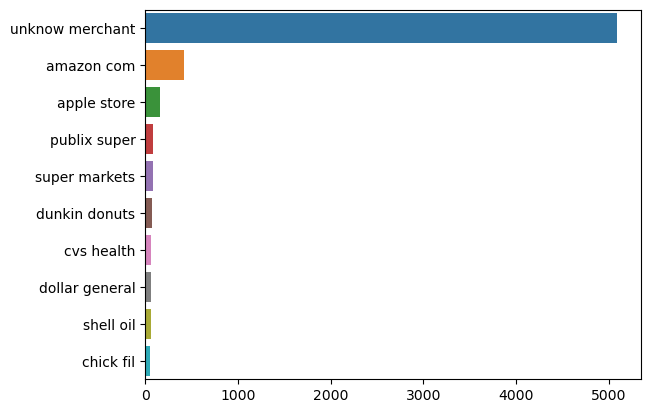

In [40]:
# top_n_bigrams=get_top_ngram(df_known_merchs['AFS_MECHANT_NAMES'],2)[:10] 
top_n_bigrams=get_top_ngram(df_known_merchs['merchant_name'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x);

In [41]:
# ================================================================
# ================================================================
# ================================================================
# ================================================================
# def check_names(merchant, t_details):
    
#     # Variations for merchant name column
#     merchant_1 = merchant
#     merchant_2 = merchant_1.lower()
#     merchant_3 = re.sub("[\\\\/:*?'#<>|-]", '', merchant_2)
#     merchant_4 = re.sub(' ', '', merchant_2)
#     merchant_5 = re.sub('[.com/%]', ' ', merchant_2)
#     merch_list = merchant_1.split() + merchant_2.split() + merchant_3.split() + merchant_4.split() + merchant_5.split() + merchant.split()
    
#     # Variations for transaction details column
#     t_details_1 = t_details
#     t_details_2 = t_details.lower()
#     t_details_3 = re.sub("[\\\\/:*?'#<>|-]", '', t_details_2)
#     t_details_4 = re.sub("[.com/%]", " ",t_details_2)
#     t_details_5 = re.sub("[\\\\/:*?'#<>|-]", ' ', t_details_2)
#     date_pattern = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", t_details_2)
    
#     # Merchants mentioned in transaction description w/ variations
#     comp_1 = re.sub("Prime", "AMAZONVOD",t_details_1)
#     comp_2 = re.sub("VZWRLSS", "VERIZON WIRELESS",t_details_1)
#     comp_3 = re.sub("WM", "WALMART",t_details_1)
    
#     #################################
    
#     #################################
    
#     # Creating a list of conversions to check if merchants are mentioned in transation descriotions 
#     details_lis = t_details_2.split()
#     details_lis_1 = t_details_1.split() + t_details_2.split() + t_details_3.split() + details_lis + t_details_4.split() + t_details_5.split() + comp_1.split() + comp_2.split() + comp_3.split() + t_details.split() + date_pattern.split()
    
#     # Conditions to check if words are in transaction strings
#     if (merchant in t_details_3 or t_details_3 in merchant or           #VEEEEEERRRR  merchant in t_details_3 or t_details_3 in merchant or 
#         (merchant_2 in t_details_3 or t_details_3 in merchant_2) or 
#         (merchant_3 in t_details_3 or t_details_3 in merchant_3) or
#         (merchant_4 in t_details_3 or t_details_3 in merchant_4) or
#         (merchant_1 in t_details_3 or t_details_1 in merchant_4) or
#         (merchant_1 in details_lis_1 or merchant_4 in details_lis)or
#         (any(item in merch_list for item in details_lis_1)) or
#         (merchant_1[:4] in t_details_1)):
#         return True
#     else:
#         return False
    

- Checked the occurrence of merchants in the first and secod transation colums separately
- Checked the total number of occurrences per column

In [42]:

# ================================================================
# ================================================================
# ================================================================
# ================================================================
# # Merchants in the txt_1 or txt_2 columns
# df_known_merchs_cp2['txn_desc2'] = df_known_merchs_cp2['txn_desc2'].astype(str)
# df_known_merchs_cp2['txn_desc1'] = df_known_merchs_cp2['txn_desc1'].astype(str)
# df_known_merchs_cp2['merchant_name'] = df_known_merchs_cp2['merchant_name'].astype(str)
# df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] = df_known_merchs_cp2.apply(lambda x: check_names(x.merchant_name, x.txn_desc1), axis=1) # OR txn_desc2
df_known_merchs_cp2.head(5)

,transaction_id,txn_desc1,txn_desc2,merchant_name
2228,T9968fadfa3b23db089973f0614ab4bba,Withdrawal #**,SAFEWAY #2097 PHOENIX AZ,SAFEWAY
12607,Tcb5e4a23d146362fb6b0936b8e0dc387,ACH Withdrawal,CHASE CREDIT CRD - *7710 - EPAY,Unknow Merchant
41069,Ta61caa9aa48b33d199ce8a4b86373229,Point Of Sale Withdrawal SQ,*CHRISTIAN FELLOWSH EVANSVILLE IN,Unknow Merchant
27769,T0273ec4d887230d7b39358119a1c4d9d,Card purchase,DANNY'S SUPER FOODS 5411 (2022-09-05) ORANGE TX *01,Unknow Merchant
44308,Tfd0a0c8b96d93924bf29e2827a0affea,Withdrawal #*,PRICE CHOPPER # PUTNAM CT %% Card 15 #*7789,PRICE CHOPPER


In [43]:
print('Total of transactions with known merchants:\n',len(df_known_merchs_cp2))

Total of transactions with known merchants:
 10000


In [44]:
#print('Merchant name occurrence in txn_desc1 column:\n',(df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] == True).sum())

In [45]:
#df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] = df_known_merchs_cp2.apply(lambda x: check_names(x.merchant_name, x.txn_desc2), axis=1)
#print('Merchant name occurrence in txn_desc2 column:\n',(df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] == True).sum())

- Checked occurrence of merchants in concatenated transaction column
- Created CHECK_MERCH_TRA to inspect occurrences
- Checked total number of occurences in merchant details coolumn

In [46]:
# Checking if merchant names are mentioned in the transaction description
#df_known_merchs['CHECK_MERCH_TRA'] = df_known_merchs.apply(lambda x: check_names(x.AFS_MECHANT_NAMES, x.TRANSACTION_DETAILS), axis=1)
# ================================================================
# ================================================================
df_known_merchs.head(5)

,transaction_id,merchant_name,TRANSACTION_DETAILS
2228,T9968fadfa3b23db089973f0614ab4bba,SAFEWAY,Withdrawal #** SAFEWAY #2097 PHOENIX AZ
12607,Tcb5e4a23d146362fb6b0936b8e0dc387,Unknow Merchant,ACH Withdrawal CHASE CREDIT CRD - *7710 - EPAY
41069,Ta61caa9aa48b33d199ce8a4b86373229,Unknow Merchant,Point Of Sale Withdrawal SQ *CHRISTIAN FELLOWSH EVANSVILLE IN
27769,T0273ec4d887230d7b39358119a1c4d9d,Unknow Merchant,Card purchase DANNY'S SUPER FOODS 5411 (2022-09-05) ORANGE TX *01
44308,Tfd0a0c8b96d93924bf29e2827a0affea,PRICE CHOPPER,Withdrawal #* PRICE CHOPPER # PUTNAM CT %% Card 15 #*7789


In [47]:
# Merchant name in the transaction description
#print('Merchant name in the transaction description:\n',(df_known_merchs['CHECK_MERCH_TRA'] == True).sum() )

- Created a copy to encode CHECK_MERCH_TRA results
- Created a chart to compare the results
- Created a word cloud of AFS_MECHANT_NAMES to get most frequen merchants
- Checked how many times merchants are mentioned in transaction details
- Checked how many times merchants are not in transaction details
- Created word cloud for merchants not in transaction details 

In [48]:
#df_known_merchs_cp = df_known_merchs[['transaction_id','TRANSACTION_DETAILS','AFS_PAYMENT_AGENTS','AFS_MECHANT_NAMES','CHECK_MERCH_TRA']].copy(deep=True)
# ================================================================
# ================================================================
df_known_merchs_cp = df_known_merchs[['transaction_id','TRANSACTION_DETAILS','merchant_name']].copy(deep=True)
df_known_merchs_cp.head()

,transaction_id,TRANSACTION_DETAILS,merchant_name
2228,T9968fadfa3b23db089973f0614ab4bba,Withdrawal #** SAFEWAY #2097 PHOENIX AZ,SAFEWAY
12607,Tcb5e4a23d146362fb6b0936b8e0dc387,ACH Withdrawal CHASE CREDIT CRD - *7710 - EPAY,Unknow Merchant
41069,Ta61caa9aa48b33d199ce8a4b86373229,Point Of Sale Withdrawal SQ *CHRISTIAN FELLOWSH EVANSVILLE IN,Unknow Merchant
27769,T0273ec4d887230d7b39358119a1c4d9d,Card purchase DANNY'S SUPER FOODS 5411 (2022-09-05) ORANGE TX *01,Unknow Merchant
44308,Tfd0a0c8b96d93924bf29e2827a0affea,Withdrawal #* PRICE CHOPPER # PUTNAM CT %% Card 15 #*7789,PRICE CHOPPER


In [49]:
# plt.figure(figsize=(6, 4))
# sns.countplot(x="CHECK_MERCH_TRA", data=df_known_merchs_cp)
# plt.title("Distribution of CHECK_MERCH_TRA");

In [50]:
#print('Percentage of merchant names in T details or not (1/0):\n',(df_known_merchs_cp.CHECK_MERCH_TRA).value_counts(normalize=True).mul(100).round(1).astype(str) + '%');

In [51]:
# # Number of merchant names in transaction details
# df_check_true = pd.DataFrame()
# df_check_true = df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA'] == True]
# print('Number of merchant names in transaction details:\n',len(df_check_true))

In [52]:
# Word cloud for more frequent merchant names WHEN merchant name is in transaction description

# word_cloud(df_check_true.AFS_MECHANT_NAMES)

In [53]:
# print('Total number of occurences per merchant name:\n',(df_check_true.AFS_MECHANT_NAMES).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

In [54]:
# print('Number of merchant names NOT in the transaction description:\n',(df_known_merchs['CHECK_MERCH_TRA'] == False).sum())

In [55]:
# # Number of merchant names not in transaction details
# df_check_false = pd.DataFrame()
# df_check_false = df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA'] == False]
# #print('Number of merchant names NOT in the transaction description:\n', len(df_check_false))

In [56]:
# # Word cloud for more frequent merchant names WHEN merchant name is NOT in transaction description
# word_cloud(df_check_false.AFS_MECHANT_NAMES)

In [57]:
#print('Total number of occurences per merchant name WHEN merchant name is NOT in transation details:\n', (df_check_false.AFS_MECHANT_NAMES).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

- Merchant names not mentioned in transaction description

In [58]:
# # Merchant names not mentioned in transaction description
# df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA']==False] 


# Named Entity Recognition
- Created a copy of df_known_merchs for predictions purposes - "df_known_merchs_pred"
- Created the PREDICTIONS column
- Used NER from Spacy
- Applied Entity Ruler to add all the merchants (PATTERNS) from AFS into the model
- Defined function to find patterns from AFS predictions - "def_patterns"
- Defined function to find the organisations in the Transaction details column - "find_org"
- Defined funtion to implement parallel processing = "find_org_parallel"
- Implemented cust NER model and displayed the results

In [59]:
df_known_merchs_pred = df_known_merchs.copy(deep=True)
#df_known_merchs_pred['AFS_MECHANT_NAMES'] = df_known_merchs_pred['AFS_MECHANT_NAMES'].str.lower()
#df_known_merchs_pred['TRANSACTION_DETAILS']= df_known_merchs_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [60]:
df_known_merchs_pred.head(10)

,transaction_id,merchant_name,TRANSACTION_DETAILS
2228,T9968fadfa3b23db089973f0614ab4bba,SAFEWAY,Withdrawal #** SAFEWAY #2097 PHOENIX AZ
12607,Tcb5e4a23d146362fb6b0936b8e0dc387,Unknow Merchant,ACH Withdrawal CHASE CREDIT CRD - *7710 - EPAY
41069,Ta61caa9aa48b33d199ce8a4b86373229,Unknow Merchant,Point Of Sale Withdrawal SQ *CHRISTIAN FELLOWSH EVANSVILLE IN
27769,T0273ec4d887230d7b39358119a1c4d9d,Unknow Merchant,Card purchase DANNY'S SUPER FOODS 5411 (2022-09-05) ORANGE TX *01
44308,Tfd0a0c8b96d93924bf29e2827a0affea,PRICE CHOPPER,Withdrawal #* PRICE CHOPPER # PUTNAM CT %% Card 15 #*7789
7753,T3cfd2bffa43b382b9c50758e5d0a4de0,AMAZON.COM,Amazon.com*VV5GU34Z3 DBT CRD 0310 01/29/23 *25 Amzn.com/billWA nan
10918,T78b8cc35d4ba398aa24e07f7bf8d3ed0,Unknow Merchant,"Withdrawal Bill Payment #* AMERICAN FIRST FINANCE, I 855-*8 TX %% Card 15 #9488"
21947,Tf64538e8e0723545b6246d3e6a63aa50,CVS HEALTH,POS Withdrawal (FIS) CVS PHARMACY #0 CVS PHARMACY #01068 ATHOL MA(2601)
39404,Tebfda646a7753e2dbb1349e1f70d3fd1,BOB EVANS,BOB EVANS REST #202 CHILLICOTHE OHUS : POS Transaction REF:***44975 PUR DATE:*26
10206,T0f9aa3937fe03e6c98add7898f299e48,Unknow Merchant,PAYPAL INST XFER nan


- Function to find and create a list of patterns

In [61]:
def def_patterns(a):

    #Creating a list of patterns - with all the merchant names (with and without spaces, quotes, .com, etc.)

    org =  a #df_known_payment_agents['AFS_MECHANT_NAMES']

    #List of Entities and Patterns
    org_list = org.tolist()

    a = [ x.strip() for x in org_list] # list comprehension - all merchant names from original org_list
    a_space =list(filter(lambda x: ' ' in x, a)) # filtering all names w spaces
    a_nospace = [x.replace(' ', '') for x in a_space] # replacing spaces w ''

    a_quo =list(filter(lambda x: "'" in x, a)) # filtering all names w quotes
    a_noquuo = [x.replace("'", '') for x in a_quo] # replacing quotes w ''

    a_com =list(filter(lambda x: '.com' in x, a)) # filtering all names w .com
    a_nocom = [x.replace('.com', '') for x in a_com] # replacing .com w ''

    a_dash =list(filter(lambda x: '-' in x, a)) # filtering all names w dash
    a_nodash = [x.replace('-', '') for x in a_com] # replacing dash w ''

    new_lis = a + a_nospace + a_nocom + a_noquuo + a_nodash # add instead of dis_list


    # Creating a list of patterns with all the variations from new_lis
    patterns = []
    i = 0
    new_lis = tuple(new_lis)
    for item in new_lis:
        patterns.append({"label": 'ORG', "pattern": [{"LOWER":item}]})
        # patterns.append({"label": 'ORG', "pattern": new_lis[i]})
        i+=1

    # #print(patterns)
    #patterns.append(listb)
    #print(patterns)


    return patterns

In [62]:
#patterns = def_patterns(df_known_merchs_pred['AFS_MECHANT_NAMES'])

- Function to find organisations using patterns

In [63]:
# Function to find merchant names in a string - using an NER model with the previously created patterns

def find_org(text:str):
    
    #Build upon the spaCy Model
    NER2 = spacy.load("en_core_web_sm")
    
    #Create the EntityRuler
    ruler = NER2.add_pipe("entity_ruler", config={'validate': True})
     
    ruler.add_patterns(patterns)
    doc_ner = NER2(text)
    
    # useless strings
    junk = ['fip', 'ca(2810','fis','xx4386', '#185','*','hr0d','k50ms3hv','xx9510','xx4710','xx4706','xx0322','he34i8pz0','xx3840','pd1387','ma(9661','ns4qa9xb3 ']
    
    #extract entities
    orgs = []
    for ent in doc_ner.ents:
        if ((ent.label_ == "ORG") and (ent.text not in junk)):
            orgs.append(ent.text)
    orgs = list(set(orgs))
    return ' '.join(orgs) if orgs else 'NA'

- Function for parallel processing

In [64]:
def find_org_parallel(a:dict):
    i=a.copy()
    print(i)
    result = find_org(i['TRANSACTION_DETAILS'])
    i['PREDICTIONS']= result
    print(i)
    return i

In [65]:
df_known_merchs_pred.head(5)

,transaction_id,merchant_name,TRANSACTION_DETAILS
2228,T9968fadfa3b23db089973f0614ab4bba,SAFEWAY,Withdrawal #** SAFEWAY #2097 PHOENIX AZ
12607,Tcb5e4a23d146362fb6b0936b8e0dc387,Unknow Merchant,ACH Withdrawal CHASE CREDIT CRD - *7710 - EPAY
41069,Ta61caa9aa48b33d199ce8a4b86373229,Unknow Merchant,Point Of Sale Withdrawal SQ *CHRISTIAN FELLOWSH EVANSVILLE IN
27769,T0273ec4d887230d7b39358119a1c4d9d,Unknow Merchant,Card purchase DANNY'S SUPER FOODS 5411 (2022-09-05) ORANGE TX *01
44308,Tfd0a0c8b96d93924bf29e2827a0affea,PRICE CHOPPER,Withdrawal #* PRICE CHOPPER # PUTNAM CT %% Card 15 #*7789


In [66]:
#t_list = df_known_merchs_pred[['transaction_id', 'TRANSACTION_DETAILS', 'AFS_MECHANT_NAMES', 'CHECK_MERCH_TRA']].copy(deep=True).to_dict(orient='records') #replace similarity w unique ID

In [67]:
# df_known_merchs_pred['PREDICTIONS'] = df_known_merchs_pred.TRANSACTION_DETAILS.swifter.apply(find_org)

In [68]:
#par = Parallel(n_jobs=-1)(delayed(find_org_parallel)(i) for i in tqdm(t_list))

In [69]:
#df_known_merchs_pred = pd.DataFrame(par)

In [70]:
df_known_merchs_pred

,transaction_id,merchant_name,TRANSACTION_DETAILS
2228,T9968fadfa3b23db089973f0614ab4bba,SAFEWAY,Withdrawal #** SAFEWAY #2097 PHOENIX AZ
12607,Tcb5e4a23d146362fb6b0936b8e0dc387,Unknow Merchant,ACH Withdrawal CHASE CREDIT CRD - *7710 - EPAY
41069,Ta61caa9aa48b33d199ce8a4b86373229,Unknow Merchant,Point Of Sale Withdrawal SQ *CHRISTIAN FELLOWSH EVANSVILLE IN
27769,T0273ec4d887230d7b39358119a1c4d9d,Unknow Merchant,Card purchase DANNY'S SUPER FOODS 5411 (2022-09-05) ORANGE TX *01
44308,Tfd0a0c8b96d93924bf29e2827a0affea,PRICE CHOPPER,Withdrawal #* PRICE CHOPPER # PUTNAM CT %% Card 15 #*7789
...,...,...,...
15922,T4719332c4f9b3a7893f4022dd07dfced,Unknow Merchant,ATM Withdrawal ANDREWS FEDERAL 7950 CHIEVRES-BLG 2CHIEVRES AEUS
35674,T4b1899082f7c3e32a9c952e1a15d63cc,Unknow Merchant,Withdrawal CSAA IG CO: CSAA IG NAME: JENN DOBB
36247,T03c4ed8c9fcf35bf854167ff324e6c8a,Unknow Merchant,Withdrawal #** KIRTLAND AFB COM 7801 GIB KIRTLAND AFB NM Card 7852 Merchant Category Code: 5411
20935,T204aa0729f44310885354a634f6e05bb,SPEEDWAY,POS Transaction SPEEDWAY 03637 4208 YOUNGSTOWN OHUS


- Function to compare results - True/False

In [71]:
def check_names_pred(a, b):
    if ((a in b) or (b in a)):
        return True
    elif (fuzz.ratio(a, b) > 92):
        return True
    else:
        return False

- NER predictions using Spacy and Entity Ruler technique

In [72]:
def check_names_pred_2(a, b):
    
    
    # if ((a in b) or (b in a)):
    #     b=a
    #     return b
    
    # Variations for merchant name column
    merchant_1 = a
    merchant_2 = merchant_1.lower()
    merchant_3 = re.sub("[\\\\/:*?'#<>|-]", '', merchant_2)
    merchant_4 = re.sub(' ', '', merchant_2)
    merchant_5 = re.sub('[.com/]', ' ', merchant_2)
    date_pattern_1 = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", merchant_2)
    merch_list = merchant_1.split() + merchant_2.split() + merchant_3.split() + merchant_4.split() + merchant_5.split() + a.split() + date_pattern_1.split()     #merch_list =  a.split()
    
    # Variations for transaction details column
    t_details_1 = b
    t_details_2 = b.lower()
    t_details_3 = re.sub("[\\\\/:*?'#<>|-]", '', t_details_2)
    t_details_4 = re.sub("[.com/]", " ",t_details_2)
    t_details_5 = re.sub("[\\\\/:*?'#<>|-]", ' ', t_details_2)
    date_pattern = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", t_details_2)
    
    # Merchants mentioned in transaction description w/ variations
    comp_1 = re.sub("Prime", "AMAZONVOD",t_details_1)
    comp_2 = re.sub("VZWRLSS", "VERIZON WIRELESS",t_details_1)
    comp_3 = re.sub("WM", "WALMART",t_details_1)
   
    
    # Creating a list of conversions to check if merchants are mentioned in transation descriotions 
    #details_lis = t_details_2.split()
    details_lis_1 = t_details_1.split() + t_details_2.split() + t_details_3.split() + t_details_4.split() + t_details_5.split() + comp_1.split() + comp_2.split() + comp_3.split() + b.split() + date_pattern.split()
    #details_lis_1 = b.split() + date_pattern.split()
    
    
    # Conditions to check if words are in transaction strings
    if (a in b or t_details_3 in a or 
        (merchant_2 in t_details_3 or t_details_3 in merchant_2) or
        (merchant_4 in t_details_3 or t_details_3 in merchant_4) or
        (any(item in merch_list for item in details_lis_1)) or
        (any(item in details_lis_1 for item in merch_list)) or
        (merchant_1[:3] in t_details_1)):
        b=a
        return b #True
    elif ((fuzz.ratio(a, b) > 90) or 
          (fuzz.partial_ratio(a , b) > 90) or 
          (fuzz.token_sort_ratio(a,b) > 90)):
        b=a
        return b #True
    else:
        b = 'nothing'
        return b #False
    

In [73]:
# df_known_merchs_pred['CHECK_TF'] = df_known_merchs_pred.apply(lambda x: check_names(x.AFS_MECHANT_NAMES, x.PREDICTIONS), axis=1)
# df_known_merchs_pred.head(10)

In [74]:
# (df_known_merchs_pred.CHECK_TF).value_counts()

In [75]:
# df_known_merchs_pred['CHECK_TF_2'] = df_known_merchs_pred.apply(lambda x: check_names_pred_2(x.AFS_MECHANT_NAMES, x.PREDICTIONS), axis=1)
# df_known_merchs_pred.head(10)

In [76]:
#df_known_merchs_pred = df_known_merchs_pred.sample(450)

In [77]:
# predicted_labels = df_known_merchs_pred['CHECK_TF_2']
# true_labels = df_known_merchs_pred['AFS_MECHANT_NAMES']
# print(metrics.classification_report(true_labels, predicted_labels))

In [78]:
# (df_known_merchs_pred.CHECK_TF_2).value_counts()

In [79]:
def c_matrix(a_pred, a_test):

    # count the number of occurrences of each predicted label
    value_counts = Counter(a_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # print the top 10 labels by count
    for label in sorted_labels[:10]:
        print(f"{label}: {value_counts[label]}")
    

    # get the indices of the top 10 predicted values
    top_10_labels = sorted_labels[:10]

    # filter the true and predicted labels to only include the top 10 labels
    top_10_true = [label if label in top_10_labels else "Other" for label in a_test]
    top_10_pred = [label if label in top_10_labels else "Other" for label in a_pred]

    # create the confusion matrix
    cm = confusion_matrix(top_10_true, top_10_pred,normalize='true')
    

    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=top_10_labels + ["Other"], yticklabels=top_10_labels + ["Other"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    
    #========================================================================================================================
    
    
    # # sort the labels by ascending order of count
    # sorted_labels2 = sorted(value_counts, key=value_counts.get, reverse=False)

    # # print the 10 least predicted labels by count
    # for label2 in sorted_labels2[:10]:
    #     print(f"{label2}: {value_counts[label2]}")
    

    # # get the indices of the top 10 predicted values
    # least_10_labels = sorted_labels2[:10]

    # # filter the true and predicted labels to only include the top 10 labels
    # least_10_true = [label2 if label2 in least_10_labels else "Other" for label2 in a_test]
    # least_10_pred = [label2 if label2 in least_10_labels else "Other" for label2 in a_pred]

    # # create the confusion matrix
    # cm = confusion_matrix(least_10_true, least_10_pred,normalize='true')

    # # plot the confusion matrix
    # fig, ax = plt.subplots(figsize=(6, 6))
    # sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=least_10_labels + ["Other"], yticklabels=least_10_labels + ["Other"])
    # plt.xlabel("Predicted Label")
    # plt.ylabel("True Label")
    # plt.show()
    
    return

In [80]:
# c_matrix(predicted_labels, true_labels)

In [81]:
# fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
# df_known_merchs_pred.groupby('CHECK_TF').size().plot(kind='pie', autopct='%.2f', title='Accuracy Percentage', explode=[0.05, 0.05], legend=True, shadow=True)
# ax1.set_ylabel('', size=10);


In [82]:
# (df_known_merchs_pred.CHECK_TF).value_counts()

# ML Models - Labelling
- Created different classification models for labelling
    - Multinomial Naive Bayes
    - Linear SVC
    - K-Nearest Neighbors

In [83]:
####################################################################################

In [84]:
# df_unknown_class_pred = df_unknown_merchs[['transaction_id','TRANSACTION_DETAILS','AFS_MECHANT_NAMES']].copy(deep=True)
# df_unknown_class_pred['AFS_MECHANT_NAMES'] = df_unknown_class_pred['AFS_MECHANT_NAMES'].str.lower()
# df_unknown_class_pred['TRANSACTION_DETAILS']= df_unknown_class_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [85]:
#df_unknown_class_pred

In [86]:
##################################################################################

In [87]:
##################################################################################
##################################################################################
##################################################################################
df_known_class_pred = df_known_merchs[['transaction_id','TRANSACTION_DETAILS','merchant_name']].copy(deep=True)
# df_known_class_pred['AFS_MECHANT_NAMES'] = df_known_class_pred['AFS_MECHANT_NAMES'].str.lower()
# df_known_class_pred['TRANSACTION_DETAILS']= df_known_class_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")
df_known_class_pred = df_known_merchs.copy(deep=True)

In [88]:
df_known_class_pred.head(6)

,transaction_id,merchant_name,TRANSACTION_DETAILS
2228,T9968fadfa3b23db089973f0614ab4bba,SAFEWAY,Withdrawal #** SAFEWAY #2097 PHOENIX AZ
12607,Tcb5e4a23d146362fb6b0936b8e0dc387,Unknow Merchant,ACH Withdrawal CHASE CREDIT CRD - *7710 - EPAY
41069,Ta61caa9aa48b33d199ce8a4b86373229,Unknow Merchant,Point Of Sale Withdrawal SQ *CHRISTIAN FELLOWSH EVANSVILLE IN
27769,T0273ec4d887230d7b39358119a1c4d9d,Unknow Merchant,Card purchase DANNY'S SUPER FOODS 5411 (2022-09-05) ORANGE TX *01
44308,Tfd0a0c8b96d93924bf29e2827a0affea,PRICE CHOPPER,Withdrawal #* PRICE CHOPPER # PUTNAM CT %% Card 15 #*7789
7753,T3cfd2bffa43b382b9c50758e5d0a4de0,AMAZON.COM,Amazon.com*VV5GU34Z3 DBT CRD 0310 01/29/23 *25 Amzn.com/billWA nan


In [89]:
def top_hists(t_pred, t_test):
    
    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # get the top 10 labels and their counts
    top_10_labels = sorted_labels[:10]
    top_10_counts = [value_counts[label] for label in top_10_labels]

    # create the horizontal bar plot
    plt.figure(figsize=(6,6))
    sns.barplot(x=top_10_counts, y=top_10_labels, orient='h')
    plt.title('Histogram of Top 10 Labels')
    plt.xlabel('Count')
    plt.ylabel('Label')
    plt.show()
    
    #=========================================================================================
    

    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # get the top 10 predicted labels and their counts
    top_10_labels = sorted_labels[:10]
    top_10_counts = [value_counts[label] for label in top_10_labels]

    # create a horizontal bar plot for the top 10 predicted labels
    plt.figure(figsize=(6,6))
    plt.barh(range(len(top_10_labels)), top_10_counts, align='center')
    plt.yticks(range(len(top_10_labels)), top_10_labels)
    plt.xlabel('Count')
    plt.ylabel('Predicted Label')
    plt.title('Top 10 Predicted Labels')
    plt.show()
    
    #=========================================================================================
    

    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by ascending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=False)

    # get the least 10 predicted labels and their counts
    least_10_labels = sorted_labels[:10]
    least_10_counts = [value_counts[label] for label in least_10_labels]

    # create a horizontal bar plot for the least 10 predicted labels
    plt.figure(figsize=(6,6))
    plt.barh(range(len(least_10_labels)), least_10_counts, align='center')
    plt.yticks(range(len(least_10_labels)), least_10_labels)
    plt.xlabel('Count')
    plt.ylabel('Predicted Label')
    plt.title('Least 10 Predicted Labels')
    plt.show()

    return

In [90]:
def df_description(clss, a_test,a_pred,a_train,b_train,b_test, ccc):     
    #(classifier, y_test, y_pred, y_train,X_train,X_test)
    
    print('Accuracy : {0:0.3f}'.format(accuracy_score(a_test, a_pred)))
    
    #========================================================================================================================
    
    
    print('Number of unique merchants in the test set: ', len(a_test.unique()))
    print('Number of unique merchants in the predicted set: ', len(np.unique(a_pred)))
    print('Number of unique merchants in train set: ', len(a_train.unique()))
    print('Number of unique merchants in OVERS train set: ', len(ccc.unique()))
    print('\nNumber of unique "Transaction Details" rows in test set: ', len(b_train.unique()))
    print('Number of unique "Transaction Details" rows in train set: ', len(b_test.unique()))
    print('\nTotal number of rows in the train set: ', len(b_train))
    print('Total number of rows in the test set', len(b_test))
    
    
    train_acc = accuracy_score(a_train, clss.predict(b_train))
    test_acc = accuracy_score(a_test, a_pred)
    print("Train accuracy:", train_acc)
    print("Test accuracy:", test_acc)
    
    
    #========================================================================================================================
    
    
    # Get the classification report as a string
    report_dict = metrics.classification_report(a_test, a_pred, zero_division=0, output_dict=True)

    # Convert the report dictionary to a pandas dataframe
    report_data = pd.DataFrame(report_dict).transpose()
    
    precision_count = (report_data['precision'] == 1).sum()
    total_categories = report_data.shape[0]
    precision_percentage = precision_count / total_categories * 100
    
    print('\n===================================\n')
    print('Percentage of best precision', precision_percentage)
    
    recall_count = (report_data['recall'] == 1).sum()
    total_categories = report_data.shape[0]
    recall_percentage = recall_count / total_categories * 100
    print('===================================\n')
    print('Percentage of best recall', recall_percentage)
    
    f1score_count = (report_data['f1-score'] == 1).sum()
    total_categories = report_data.shape[0]
    f1score_percentage = f1score_count / total_categories * 100
    print('===================================\n')
    print('Percentage of best f1score', f1score_percentage)
    
    print('===================================\n')
    
    
    top_hists(a_pred, a_test)
    c_matrix(a_pred, a_test)
    
    return
    
    

In [91]:
def c_matrix(a_pred, a_test):

    # count the number of occurrences of each predicted label
    value_counts = Counter(a_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # print the top 10 labels by count
    for label in sorted_labels[:10]:
        print(f"{label}: {value_counts[label]}")
    

    # get the indices of the top 10 predicted values
    top_10_labels = sorted_labels[:10]

    # filter the true and predicted labels to only include the top 10 labels
    top_10_true = [label if label in top_10_labels else "Other" for label in a_test]
    top_10_pred = [label if label in top_10_labels else "Other" for label in a_pred]

    # create the confusion matrix
    cm = confusion_matrix(top_10_true, top_10_pred, normalize='true')

    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=top_10_labels + ["Other"], yticklabels=top_10_labels + ["Other"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    
    #========================================================================================================================
    

    # # sort the labels by ascending order of count
    # sorted_labels2 = sorted(value_counts, key=value_counts.get, reverse=False)

    # # print the 10 least predicted labels by count
    # for label2 in sorted_labels2[:10]:
    #     print(f"{label2}: {value_counts[label2]}")
    

    # # get the indices of the top 10 predicted values
    # least_10_labels = sorted_labels2[:10]

    # # filter the true and predicted labels to only include the top 10 labels
    # least_10_true = [label2 if label2 in least_10_labels else "Other" for label2 in a_test]
    # least_10_pred = [label2 if label2 in least_10_labels else "Other" for label2 in a_pred]

    # # create the confusion matrix
    # cm = confusion_matrix(least_10_true, least_10_pred, normalize='true')

    # # plot the confusion matrix
    # fig, ax = plt.subplots(figsize=(6, 6))
    # sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=least_10_labels + ["Other"], yticklabels=least_10_labels + ["Other"])
    # plt.xlabel("Predicted Label")
    # plt.ylabel("True Label")
    # plt.show()
    
    return cm

In [92]:
def l_curve(clss, xt, yt):
    #classifier, X_train_oversampled,y_train_oversampled
    
    train_sizes, train_scores, test_scores = learning_curve(
        clss, xt, yt, cv=5, scoring='f1_macro', 
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=99
    )
    
    # train_sizes, train_scores, test_scores = learning_curve(
    #     clss, xt, yt, cv=5, scoring='f1_macro', 
    #     train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=99
    # )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
    return

In [93]:
# def report_chart(report):
#     dfaa = pd.DataFrame(report).transpose()
    
#     # Sort DataFrame by F1-score column in descending order
#     df_sorted = dfaa.sort_values(by=['f1-score'], ascending=False)

#     # Get top 10 predicted classes
#     top_20 = df_sorted.head(20)

#     # Create new DataFrame with only top 10 classes
#     df_top_20 = dfaa.loc[top_20.index]

#     # Transpose new DataFrame
#     df_top_20 = df_top_20[['precision', 'recall', 'f1-score']]

#     # Create stacked bar chart
#     ax = df_top_20.plot(kind='barh', stacked=True)

#     # Set chart title and labels
#     ax.set_title('Classification Report - Top 20 Classes')
#     ax.set_xlabel('Score')
#     ax.set_ylabel('Class')

#     # Display chart
#     plt.show()
    
#     return dfaa

def report_chart(report):
    dfaa = pd.DataFrame(report).transpose()
    
    # Sort DataFrame by F1-score column in descending order
    df_sorted = dfaa.sort_values(by=['f1-score'], ascending=False)

    # Get top 10 predicted classes
    top_100 = df_sorted.head(100)

    # Create new DataFrame with only top 10 classes
    df_top_100 = dfaa.loc[top_100.index]

    # Transpose new DataFrame
    df_top_100 = df_top_100[['precision', 'recall', 'f1-score']]

    # Create stacked bar chart
    fig, ax = plt.subplots(figsize=(5, 45)) # Set figure size
    ax = df_top_100.plot(kind='barh', stacked=True, ax=ax)

    # Set chart title and labels
    ax.set_title('Classification Report - Top 100 Classes')
    ax.set_xlabel('Score')
    ax.set_ylabel('Class')

    # Display chart
    plt.show()
    
    return dfaa

In [94]:

def train(classifier, X, y):
    
    
    

    # start = time.time()
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)        
    
    # # Random over-sampling due to imbalanced classes
    # resampler = RandomOverSampler(random_state=0) 
    # X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_train.to_numpy().reshape(-1, 1), y_train) 
    # #sns.countplot(x=y_train_oversampled)  
    
    # l_curve(classifier, X_train_oversampled, y_train_oversampled) 
    # #l_curve(classifier, X_train, y_train)

    # classifier.fit(X_train_oversampled[:, 0], y_train_oversampled) 
    # #classifier.fit(X_train, y_train)                                                        
    # end = time.time()                                                                                
    
    # y_pred = classifier.predict(X_test) 
  
  
    # df_description(classifier, y_test, y_pred, y_train,X_train,X_test,y_train_oversampled)
    # # top_hists(y_pred, y_test)
    # # c_matrix(y_pred, y_test)
    # c_report = metrics.classification_report(y_test, y_pred, output_dict=True) 
    # report_chart(c_report)
    # print('\n\n', metrics.classification_report(y_test, y_pred))
    #print('\n\n', c_report)
    
    #=========================================================================================================================================
    
    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

    # # Random under-sampling due to imbalanced classes
    # resampler = RandomUnderSampler(random_state=0)
    # X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train.to_numpy().reshape(-1, 1), y_train)

    # #sns.countplot(x=y_train_undersampled)

    #l_curve(classifier, X_train, y_train) 
    #l_curve(classifier, X_train, y_train)

    classifier.fit(X_train, y_train) 
    #classifier.fit(X_train, y_train)                                                        
    end = time.time()

    y_pred = classifier.predict(X_test) 

    df_description(classifier, y_test, y_pred, y_train, X_train, X_test, y_train)
    # top_hists(y_pred, y_test)
    # c_matrix(y_pred, y_test)
    c_report = metrics.classification_report(y_test, y_pred, output_dict=True) 
    report_chart(c_report)
    print('\n\n', metrics.classification_report(y_test, y_pred))
    print('\n\n', c_report)
    
    print(len(c_report))
    print(len(y_test))
    print(len(y_pred))
    print(len(y_train))
    print(len(np.unique(y_pred)))
    # df223 = pd.DataFrame(X_test)
    # print(df223.head())
    
    
    # create a dataframe with X_test and y_test columns
    test_df = pd.concat([X_test, y_test], axis=1)
    #test_df.columns = list(X.columns) + [y]

    # add predicted values to the dataframe
    test_df['PREDICTIONS'] = y_pred
    
    # # create a dataframe with X_test and y_test columns
    # test_df = pd.concat([X_test], axis=1)
    # #test_df.columns = list(X.columns) + [y]

    # # add predicted values to the dataframe
    # test_df['PREDICTIONS'] = y_pred
    
    return test_df #X_test #classifier, df223


In [95]:
df_known_class_pred

,transaction_id,merchant_name,TRANSACTION_DETAILS
2228,T9968fadfa3b23db089973f0614ab4bba,SAFEWAY,Withdrawal #** SAFEWAY #2097 PHOENIX AZ
12607,Tcb5e4a23d146362fb6b0936b8e0dc387,Unknow Merchant,ACH Withdrawal CHASE CREDIT CRD - *7710 - EPAY
41069,Ta61caa9aa48b33d199ce8a4b86373229,Unknow Merchant,Point Of Sale Withdrawal SQ *CHRISTIAN FELLOWSH EVANSVILLE IN
27769,T0273ec4d887230d7b39358119a1c4d9d,Unknow Merchant,Card purchase DANNY'S SUPER FOODS 5411 (2022-09-05) ORANGE TX *01
44308,Tfd0a0c8b96d93924bf29e2827a0affea,PRICE CHOPPER,Withdrawal #* PRICE CHOPPER # PUTNAM CT %% Card 15 #*7789
...,...,...,...
15922,T4719332c4f9b3a7893f4022dd07dfced,Unknow Merchant,ATM Withdrawal ANDREWS FEDERAL 7950 CHIEVRES-BLG 2CHIEVRES AEUS
35674,T4b1899082f7c3e32a9c952e1a15d63cc,Unknow Merchant,Withdrawal CSAA IG CO: CSAA IG NAME: JENN DOBB
36247,T03c4ed8c9fcf35bf854167ff324e6c8a,Unknow Merchant,Withdrawal #** KIRTLAND AFB COM 7801 GIB KIRTLAND AFB NM Card 7852 Merchant Category Code: 5411
20935,T204aa0729f44310885354a634f6e05bb,SPEEDWAY,POS Transaction SPEEDWAY 03637 4208 YOUNGSTOWN OHUS


In [96]:
#df_unknown_class_pred ================================

- Multinomial Naive Bayes

In [97]:
from sklearn.preprocessing import StandardScaler
# # ss = StandardScaler().fit(df_known_class_pred['TRANSACTION_DETAILS'])
# # Xa = ss.transform(df_known_class_pred['TRANSACTION_DETAILS'])

# classifier1 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))), # 
#                         ('scaler', StandardScaler(with_mean=False)),
#                         ('classifier', MultinomialNB(alpha=0.005))])

# train(classifier1, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])
# # train(classifier1, Xa, df_known_class_pred['AFS_MECHANT_NAMES'])

# MNB = cls_acc
# Mtime = cls_time
# # print("\n\nMNB: ", MNB)
# # print("Time: ", Mtime)



- Linear SVC

Accuracy : 0.907
Number of unique merchants in the test set:  270
Number of unique merchants in the predicted set:  176
Number of unique merchants in train set:  466
Number of unique merchants in OVERS train set:  466

Number of unique "Transaction Details" rows in test set:  7621
Number of unique "Transaction Details" rows in train set:  1977

Total number of rows in the train set:  8000
Total number of rows in the test set 2000
Train accuracy: 0.997625
Test accuracy: 0.907


Percentage of best precision 50.0

Percentage of best recall 51.07913669064749

Percentage of best f1score 42.44604316546763



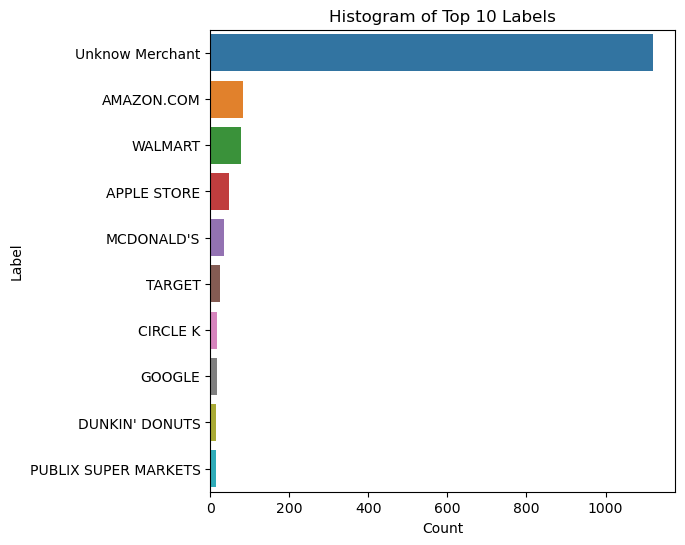

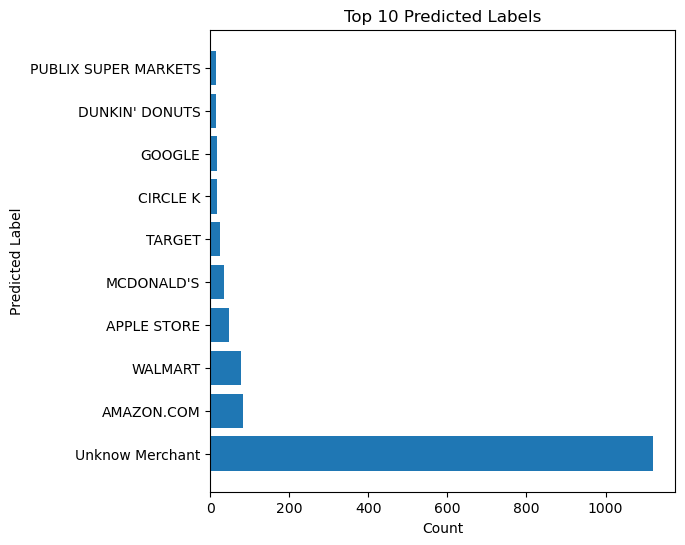

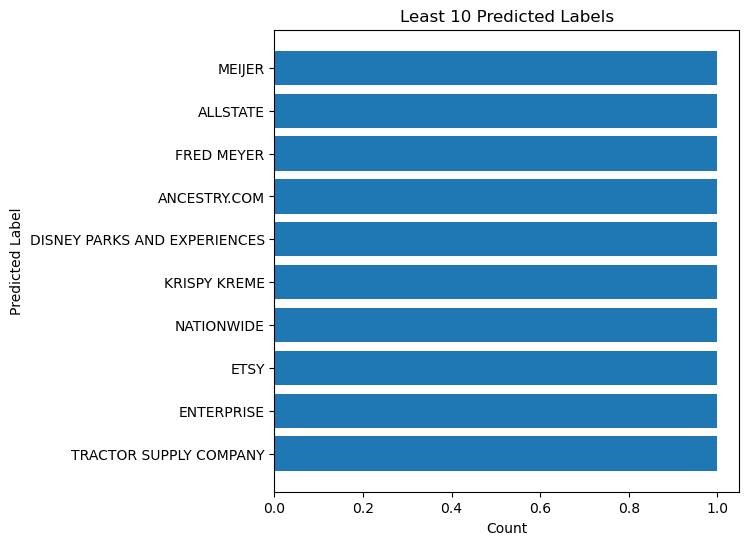

Unknow Merchant: 1120
AMAZON.COM: 84
WALMART: 77
APPLE STORE: 47
MCDONALD'S: 34
TARGET: 25
CIRCLE K: 18
GOOGLE: 18
DUNKIN' DONUTS: 16
PUBLIX SUPER MARKETS: 15


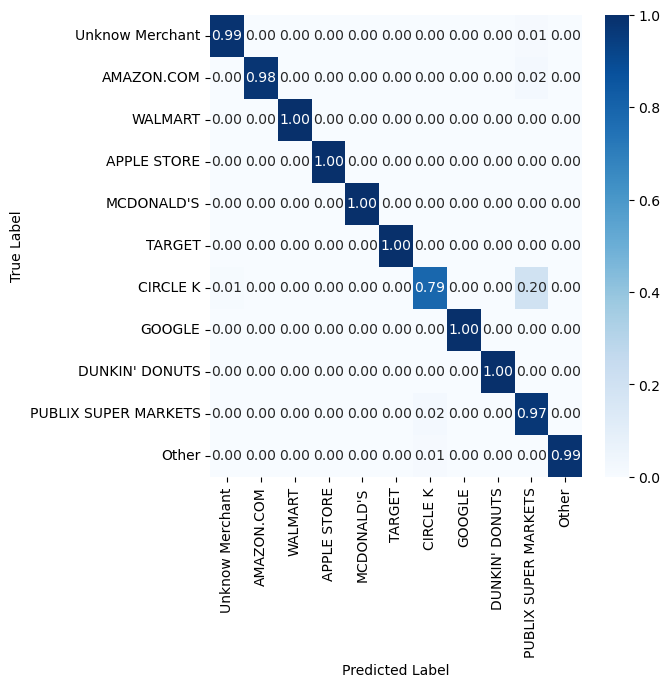

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

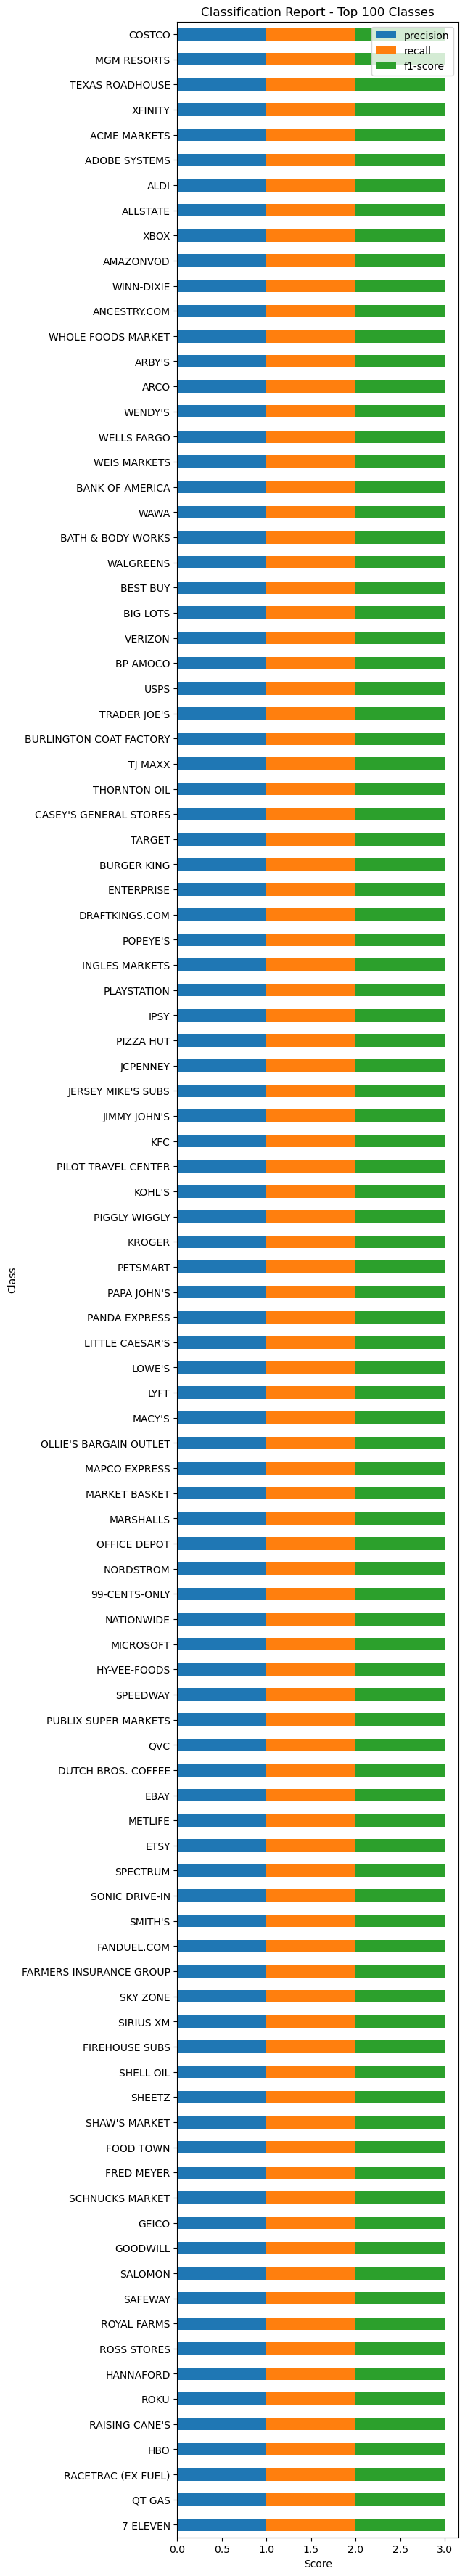



                               precision    recall  f1-score   support

                    7 ELEVEN       1.00      1.00      1.00        11
               99-CENTS-ONLY       1.00      1.00      1.00         1
   ACADEMY SPORTS + OUTDOORS       0.00      0.00      0.00         3
                ACE HARDWARE       1.00      0.75      0.86         4
                ACME MARKETS       1.00      1.00      1.00         2
               ADOBE SYSTEMS       1.00      1.00      1.00         1
                        ALDI       1.00      1.00      1.00         4
                    ALLSTATE       1.00      1.00      1.00         1
                AMAZON PRIME       0.00      0.00      0.00         5
                  AMAZON.COM       0.92      0.99      0.95        78
                   AMAZONVOD       1.00      1.00      1.00         5
           AMERICAN AIRLINES       0.00      0.00      0.00         1
                ANCESTRY.COM       1.00      1.00      1.00         1
                

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

In [98]:
from sklearn.svm import LinearSVC

classifier2 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))), 
                        #('scaler', StandardScaler(with_mean=False)),
                        ('classifier', LinearSVC(C=1.0))])

result_test = train(classifier2, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['merchant_name'])

SVC = cls_acc
Stime = cls_time
# print("\n\nSVC: ", SVC)
# print("Time: ", Stime)
                                           

In [99]:
result_test.head(100)

,TRANSACTION_DETAILS,merchant_name,PREDICTIONS
32212,ATM WITHDRAWAL PUR TARGET T-1479 LOUISVILLE KY (02/15/23 00:00:10),TARGET,TARGET
20793,Withdrawal #* WM SUPERCENTER Wal-Mart Super Cen MIDDLETOWN DE %% Card 15 #7006 %% MCC 5411,WALMART,WALMART
13646,DEBIT PURCHASE (5348) TST* LA COSECHA SACRAMENTO ** *57 Jul 22 @ 3:38p,Unknow Merchant,Unknow Merchant
27494,DDA PUR APPLE.COM/ APPLE.COM/BILL 866-712-7753 CA *,APPLE STORE,APPLE STORE
23917,BANK OF THE WEST ID: J*440 CO: BANK OF THE WEST %% ACH ECC CCD,Unknow Merchant,Unknow Merchant
...,...,...,...
11571,POS Withdrawal STARBUCKS ATRIUM ATATLANTA GAUS,STARBUCKS,STARBUCKS
42918,POS Transaction GIANT-EAGLE #41 484 E Waterloo Road Akron OHUS,GIANT EAGLE,GIANT EAGLE
42435,DBT PURCHASE ON 08/24 @ 17:46 SPANAWAY DELI INC TACOMA WA CARD NBR: -6419,Unknow Merchant,Unknow Merchant
18484,DEBIT PURCHASE CHIPOTLE ONLINE CHIPOTLE.COM CA ** Mar 20 PURCHASE AND/OR LOAN ADVANCE,CHIPOTLE MEXICAN,CHIPOTLE MEXICAN


In [100]:
df_result_test = pd.DataFrame(result_test)

In [101]:
result_csv = df_result_test.head(200)

In [102]:
result_csv

,TRANSACTION_DETAILS,merchant_name,PREDICTIONS
32212,ATM WITHDRAWAL PUR TARGET T-1479 LOUISVILLE KY (02/15/23 00:00:10),TARGET,TARGET
20793,Withdrawal #* WM SUPERCENTER Wal-Mart Super Cen MIDDLETOWN DE %% Card 15 #7006 %% MCC 5411,WALMART,WALMART
13646,DEBIT PURCHASE (5348) TST* LA COSECHA SACRAMENTO ** *57 Jul 22 @ 3:38p,Unknow Merchant,Unknow Merchant
27494,DDA PUR APPLE.COM/ APPLE.COM/BILL 866-712-7753 CA *,APPLE STORE,APPLE STORE
23917,BANK OF THE WEST ID: J*440 CO: BANK OF THE WEST %% ACH ECC CCD,Unknow Merchant,Unknow Merchant
...,...,...,...
10811,Withdrawal SUPER MERCADO MONTERREY DALLAS TX %% Card 15 #6823 #*,Unknow Merchant,Unknow Merchant
45622,DEBIT CARD DEBIT 01-08-2023 RANDALLS WINE AND S SAINT LOUIS MO auth #*,RANDALLS,Unknow Merchant
12622,Withdrawal #** PUBLIX 9930 UNIVERSAL BLVD ORLANDO FL %% Card 18 #9623,PUBLIX SUPER MARKETS,PUBLIX SUPER MARKETS
33981,AMEX EPAYMENT ACH PMT nan,Unknow Merchant,Unknow Merchant


In [103]:
# save the dataframe to a CSV file
result_csv.to_csv('result_MIX_NoPrePro.csv', index=False)

In [104]:
# # call function to train and predict using the iris dataset
# predicted_df = train_and_predict(iris, 'class')

# # display the resulting dataframe
# predicted_df.head()

In [105]:
import pandas as pd
pd.set_option('display.max_rows', 200)

In [106]:
result_csv.head(100)

,TRANSACTION_DETAILS,merchant_name,PREDICTIONS
32212,ATM WITHDRAWAL PUR TARGET T-1479 LOUISVILLE KY (02/15/23 00:00:10),TARGET,TARGET
20793,Withdrawal #* WM SUPERCENTER Wal-Mart Super Cen MIDDLETOWN DE %% Card 15 #7006 %% MCC 5411,WALMART,WALMART
13646,DEBIT PURCHASE (5348) TST* LA COSECHA SACRAMENTO ** *57 Jul 22 @ 3:38p,Unknow Merchant,Unknow Merchant
27494,DDA PUR APPLE.COM/ APPLE.COM/BILL 866-712-7753 CA *,APPLE STORE,APPLE STORE
23917,BANK OF THE WEST ID: J*440 CO: BANK OF THE WEST %% ACH ECC CCD,Unknow Merchant,Unknow Merchant
42581,Withdrawal MCSIGNATURE PANERA BREAD #* 724-775-7950 PA Date 04/17/22 ***43288 5814 %% Card 20 #7267,PANERA BREAD,PANERA BREAD
16809,Withdrawal Instant Issue IC* INSTACART 888-246-7822 CA Date 01/14/23 0 *2219 3 5411 %% Card 10 #3960,Unknow Merchant,Unknow Merchant
39402,Share Withdrawal L* 482 MAIN STREET MIDDLEFIELD CTUS,Unknow Merchant,Unknow Merchant
38540,ACH Withdrawal PAYPAL - INST XFER,Unknow Merchant,Unknow Merchant
30502,Withdrawal Visa Debit Card DUNKIN #* Q35 DARIEN IL Date 03/14/22 0 *2025 0 5814 %% Card 15 #9643,DUNKIN' DONUTS,DUNKIN' DONUTS


In [107]:
df_known_class_pred

,transaction_id,merchant_name,TRANSACTION_DETAILS
2228,T9968fadfa3b23db089973f0614ab4bba,SAFEWAY,Withdrawal #** SAFEWAY #2097 PHOENIX AZ
12607,Tcb5e4a23d146362fb6b0936b8e0dc387,Unknow Merchant,ACH Withdrawal CHASE CREDIT CRD - *7710 - EPAY
41069,Ta61caa9aa48b33d199ce8a4b86373229,Unknow Merchant,Point Of Sale Withdrawal SQ *CHRISTIAN FELLOWSH EVANSVILLE IN
27769,T0273ec4d887230d7b39358119a1c4d9d,Unknow Merchant,Card purchase DANNY'S SUPER FOODS 5411 (2022-09-05) ORANGE TX *01
44308,Tfd0a0c8b96d93924bf29e2827a0affea,PRICE CHOPPER,Withdrawal #* PRICE CHOPPER # PUTNAM CT %% Card 15 #*7789
...,...,...,...
15922,T4719332c4f9b3a7893f4022dd07dfced,Unknow Merchant,ATM Withdrawal ANDREWS FEDERAL 7950 CHIEVRES-BLG 2CHIEVRES AEUS
35674,T4b1899082f7c3e32a9c952e1a15d63cc,Unknow Merchant,Withdrawal CSAA IG CO: CSAA IG NAME: JENN DOBB
36247,T03c4ed8c9fcf35bf854167ff324e6c8a,Unknow Merchant,Withdrawal #** KIRTLAND AFB COM 7801 GIB KIRTLAND AFB NM Card 7852 Merchant Category Code: 5411
20935,T204aa0729f44310885354a634f6e05bb,SPEEDWAY,POS Transaction SPEEDWAY 03637 4208 YOUNGSTOWN OHUS


In [108]:
#result_csv["LEN_WORDS"] = result_csv["TRANSACTION_DETAILS"].apply(lambda x: len(str(x).split()))

In [109]:
#result_csv["LEN_WORDS"].describe()

In [110]:
result_csv

,TRANSACTION_DETAILS,merchant_name,PREDICTIONS
32212,ATM WITHDRAWAL PUR TARGET T-1479 LOUISVILLE KY (02/15/23 00:00:10),TARGET,TARGET
20793,Withdrawal #* WM SUPERCENTER Wal-Mart Super Cen MIDDLETOWN DE %% Card 15 #7006 %% MCC 5411,WALMART,WALMART
13646,DEBIT PURCHASE (5348) TST* LA COSECHA SACRAMENTO ** *57 Jul 22 @ 3:38p,Unknow Merchant,Unknow Merchant
27494,DDA PUR APPLE.COM/ APPLE.COM/BILL 866-712-7753 CA *,APPLE STORE,APPLE STORE
23917,BANK OF THE WEST ID: J*440 CO: BANK OF THE WEST %% ACH ECC CCD,Unknow Merchant,Unknow Merchant
42581,Withdrawal MCSIGNATURE PANERA BREAD #* 724-775-7950 PA Date 04/17/22 ***43288 5814 %% Card 20 #7267,PANERA BREAD,PANERA BREAD
16809,Withdrawal Instant Issue IC* INSTACART 888-246-7822 CA Date 01/14/23 0 *2219 3 5411 %% Card 10 #3960,Unknow Merchant,Unknow Merchant
39402,Share Withdrawal L* 482 MAIN STREET MIDDLEFIELD CTUS,Unknow Merchant,Unknow Merchant
38540,ACH Withdrawal PAYPAL - INST XFER,Unknow Merchant,Unknow Merchant
30502,Withdrawal Visa Debit Card DUNKIN #* Q35 DARIEN IL Date 03/14/22 0 *2025 0 5814 %% Card 15 #9643,DUNKIN' DONUTS,DUNKIN' DONUTS


In [111]:
# from sklearn.linear_model import SGDClassifier

# classifier = Pipeline([
#     ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),
#     ('scaler', StandardScaler(with_mean=False)),
#     ('classifier', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=1000, tol=1e-3)),
# ])

# train(classifier, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

- K-Nearest Neighbors

In [112]:
# from sklearn.neighbors import KNeighborsClassifier

# classifier4 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),
#                         ('classifier', KNeighborsClassifier(n_neighbors=5))])

# train(classifier4, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

# KNN = cls_acc
# Ktime = cls_time
# print("\n\nKNN: ", KNN)
# print("Time: ", Ktime)


# Payment Agents VS Merchant Names
- Selected known payment agents
- Checked number of total occurences per agents
- Checked total number of payment agents
- Checked number of transactions with known payment agents
- Defined a function compare payment agents with merchant names
- Created CHECK_MERCH_AGTS to check when agents and merchants are same
- Checked Totals for different situations

In [113]:
df_known_payment_agents = df_known_merchs.copy(deep=True)
# Known payment agent names
df_known_payment_agents = df_known_payment_agents.loc[df_known_payment_agents['AFS_PAYMENT_AGENTS'] != 'Unknow Payment Agent']
df_known_payment_agents

KeyError: 'AFS_PAYMENT_AGENTS'

In [ ]:
print('Number of total occurences per payment agents:\n', (df_known_payment_agents.AFS_PAYMENT_AGENTS).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

In [ ]:
print('Total number of payment agents:\n',len(df_known_payment_agents.AFS_PAYMENT_AGENTS.unique()))

In [ ]:
print('Number of transactions with known payment agents:\n',len(df_known_payment_agents))

In [ ]:
# Function to compare payment agent names with merchant names
def compare_occurences(agent, merchant):
    agent = agent.split()
    merchant = merchant.split()
    # Conditions to check if words are in transaction strings
    if (merchant in agent or agent in merchant or
        (any(item in merchant for item in agent)) or
        (merchant[:3] in agent)):
        return True
    else:
        return False

In [ ]:
# Checking if merchant names and payment agents are same
df_known_payment_agents['CHECK_MERCH_AGTS'] = df_known_payment_agents.apply(lambda x: compare_occurences(x.AFS_MECHANT_NAMES, x.AFS_PAYMENT_AGENTS), axis=1)
df_known_payment_agents.head()

- Checked how many times merchant names and payment agents are same
- Checked how many time merchant names and payment agents are different
- Checked total number of transactions with known agents

In [ ]:
print('Same merchant names and payment agents:\n',len(df_known_payment_agents.loc[df_known_payment_agents['CHECK_MERCH_AGTS']==True]))

In [ ]:
print('Merchant names and payment agents are diferent:\n',len(df_known_payment_agents.loc[df_known_payment_agents['CHECK_MERCH_AGTS']==False]))

In [ ]:
print('Number of rows with known Agents:\n',len(df_known_payment_agents))

In [ ]:
df_known_payment_agents